In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os 
import sys
sys.path.append(os.path.join(os.path.dirname('__file__'), '../selfscat/'))
from mean_xsectv_majorana import *
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 1.5 #軸の太さを設定。目盛りは変わらない
plt.rcParams['xtick.major.size'] = 10 #x軸目盛りの長さ
plt.rcParams['xtick.major.width'] = 1.5 #x軸目盛りの太さ
plt.rcParams['xtick.minor.size'] = 5#x軸目盛りの長さ
plt.rcParams['xtick.minor.width'] = 1.2 #x軸目盛りの太さ
plt.rcParams['ytick.major.size'] = 10 #x軸目盛りの長さ
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['ytick.minor.size'] = 5 #x軸目盛りの長さ
plt.rcParams['ytick.minor.width'] = 1.2
plt.rcParams['figure.autolayout'] =True

In [2]:
GeVinvTocm = 0.197e-13
GeVtogram = 1.78e-24
c = 3e5 #km/s

In [3]:
mXs = [10., 2.]
mphis = [0.01, 0.01]
alphas = [0.00099, 0.00014]
sign = 1.0
vs = np.logspace(0,4,20)/c #mean velocity, not v0
converter = GeVinvTocm**2/GeVtogram*c

xsects = []
for mX, mphi, alphaX in zip(mXs, mphis, alphas):
    xsects.append(list(map(lambda v: mean_xsectv(mX, mphi, alphaX, v, sign)/mX, vs)))

/Users/yanagi/.pyenv/versions/3.7.4/lib/python3.7/site-packages/scipy/integrate/_ivp/common.py:41: UserWarning: The following arguments have no effect for a chosen solver: `jac`.
  .format(", ".join("`{}`".format(x) for x in extraneous)))


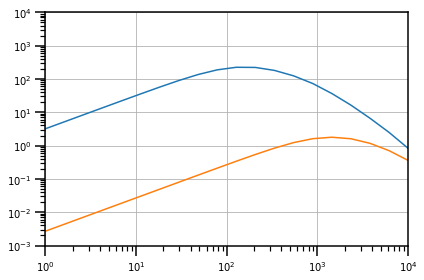

In [4]:
for xsect in xsects:
    plt.plot(vs*c, np.array(xsect)*converter)
    plt.loglog()
    plt.xlim([1,1e4])
    plt.ylim([1e-3,1e4])
    plt.grid(True)

# Partial wave component

In [5]:
from xsect_majorana_tch import xsectk2_part_wave

mX = 10
mphi = 0.01
alphaX = 0.001
sign = 1.0
vs = np.logspace(0,4,50)/c #mean velocity, not v0

b = alphaX*mX/mphi

res = list(map(lambda v: xsectk2_part_wave(a=v/(2*alphaX), b=b, sign=sign, tol=1e-3)[2], vs))

Text(0.5, 1.0, '$m_X=10$ GeV, $m_\\phi=0.01$ GeV, $\\alpha_X=0.001$')

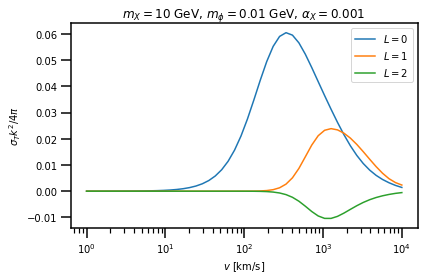

In [6]:
for i in range(3):
    y = list(map(lambda r: r[i], res))
    plt.plot(vs*c, y, label=r"$L={}$".format(i))
plt.xscale("log")
plt.legend()
#plt.yscale("log")
plt.xlabel(r"$v$ [km/s]")
plt.ylabel(r"$\sigma_T k^2/4\pi$")
plt.title(r"$m_X={}$ GeV".format(mX) + r", $m_\phi={}$ GeV".format(mphi) + r", $\alpha_X={}$".format(alphaX))

Text(0.5, 1.0, '$m_X=10$ GeV, $m_\\phi=0.01$ GeV, $\\alpha_X=0.001$')

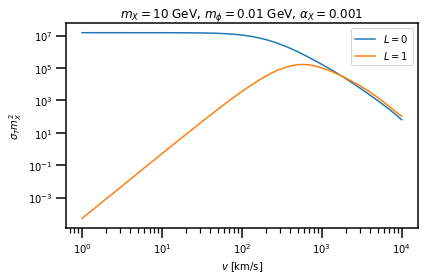

In [7]:
for i in range(2):
    y = list(map(lambda r: r[i], res))
    plt.plot(vs*c, y/vs**2*16*np.pi, label=r"$L={}$".format(i))
plt.xscale("log")
plt.legend()
plt.yscale("log")
plt.xlabel(r"$v$ [km/s]")
plt.ylabel(r"$\sigma_T m_X^2$")
plt.title(r"$m_X={}$ GeV".format(mX) + r", $m_\phi={}$ GeV".format(mphi) + r", $\alpha_X={}$".format(alphaX))

# Further benchmark

In [8]:
data = np.genfromtxt("../sample_data/fitted_xsect_log.dat", comments="#", delimiter=" ", names=("v", "sigma", "xerr", "yerr"))

In [9]:
mXs = [0.1, 10, 30, 30]
mphis = [1e-4, 1e-2, 0.03, 0.1]
alphas = [7e-6, 1e-3, 2e-3, 2e-3]
sign = 1.0

In [10]:
xsect_arr =[]
vs = np.logspace(1, 3.5,20)/c #mean velocity, not v0
for (mX, mphi, alphaX) in zip(mXs, mphis, alphas):
    print(mX)
    xsects = list(map(lambda v:mean_xsectv(mX, mphi, alphaX, v, sign, minn=10, maxn=15), vs))
    xsect_arr.append(xsects)

0.1
10
30
30


Text(0, 0.5, '$\\log_{10} \\langle \\sigma v \\rangle/m$')

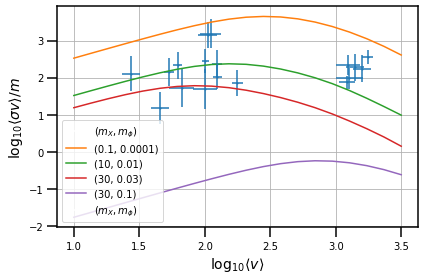

In [11]:
plt.errorbar(data["v"], data["sigma"], xerr=data["xerr"], yerr=data["yerr"], fmt="o", 
             markersize=1)

plt.plot([],[], label=r"$(m_X, m_\phi)$", color="white")
for mX, mphi, xsects in zip(mXs, mphis, xsect_arr):
    plt.plot(np.log10(vs*c), np.log10(np.array(xsects)*GeVinvTocm**2/(mX*GeVtogram)*c),
            label="({}, {})".format(mX, mphi))

plt.plot([],[], label=r"$(m_X, m_\phi)$", color="white")
plt.legend()
plt.grid(True)
plt.xlabel(r"$\log_{10} \langle v \rangle$", fontsize=14)
plt.ylabel(r"$\log_{10} \langle \sigma v \rangle/m$", fontsize=14)
#plt.savefig("sigmav.pdf")

In [12]:
mX = 2.6
mphi = 0.0036
alphaX=0.00041
sign=1.0
vs = np.logspace(1,np.log10(3000),40)/c #mean velocity, not v0
%time xsects = list(map(lambda v: mean_xsectv(mX, mphi, alphaX, v, sign, minn=10, maxn=15), vs))

CPU times: user 32.1 s, sys: 112 ms, total: 32.2 s
Wall time: 32.2 s


In [13]:
mX = 0.01
mphi = 0.015
alphaX=0.052
sign=1.0
vs = np.logspace(1,np.log10(3000),40)/c #mean velocity, not v0
%time xsects2 = list(map(lambda v: mean_xsectv(mX, mphi, alphaX, v, sign, minn=10, maxn=15), vs))

CPU times: user 16.8 ms, sys: 1.42 ms, total: 18.2 ms
Wall time: 17 ms


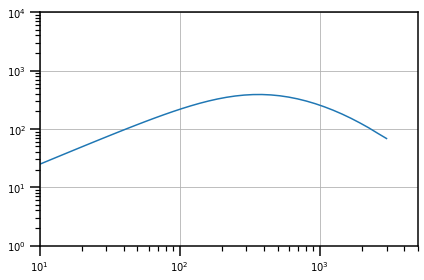

In [14]:
mX = 2.6
plt.plot(vs*c, np.array(xsects)*GeVinvTocm**2/(mX*GeVtogram)*c)

plt.loglog()
plt.xlim([10,5000])
plt.ylim([1,1e4])
plt.grid(True)
#plt.savefig('../plot/bm1.pdf', transparent=True)